# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = Your null hypothesis (considering the current is at 5% then the increase expected over the previous totals at 6%)
"""
The new email template does not have any effect on sales performance of 6% i.e X < 6%
"""

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = Your alternative hypothesis
"""
The email template has an effect on sales performance above 6% i.e X >= 6%
"""

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [3]:
# Calculate the required sample size
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.stats.power import TTestIndPower
power_thresholds = TTestIndPower()

alpha = 0.05 #significance level
std_dev = 0.0475 #standard deviation
power = 0.8 #Desired Power
mean_diff = 0.01 #response rate difference 
effect_size = mean_diff/std_dev

sample_size= power_thresholds.solve_power(alpha=.05, effect_size=effect_size, power=.80, alternative='larger')
sample_size

279.6667468021971

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

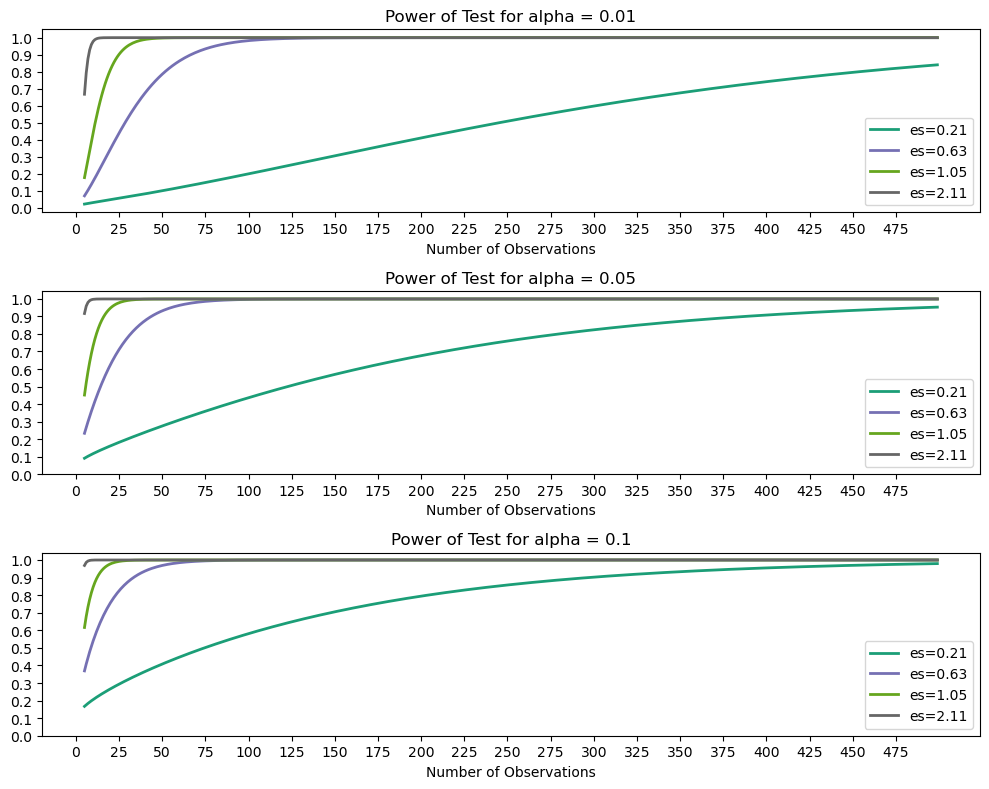

In [15]:
#Your code; plot power curves for the various alpha and effect size combinations
sd = 0.0475
effect_size01 = 0.01 / sd
effect_size1 = 0.1 / sd
effect_size05 = 0.05 / sd
effect_size03 = 0.03 / sd

# Create subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(10, 8))

# List of alpha values for the plots
alpha_values = [0.01, 0.05, 0.1]
effect_sizes = [effect_size01, effect_size03, effect_size05, effect_size1]

# Loop over each alpha value and corresponding subplot
for n, alpha in enumerate(alpha_values): #Iterate over alpha values
    ax = axes[n] #subplot axis
    power_thresholds.plot_power( #
        dep_var="nobs", #number of obsevations to plot
        nobs=np.arange(5, 500), #range of sample size
        effect_size=effect_sizes, #list of effect sizes
        alpha=alpha, #listof significance levels
        ax=ax, #subplot axis
        alternative='larger' #direction of the test
    )
    ax.set_title(f'Power of Test for alpha = {alpha}')
    ax.set_xticks(range(0, 500, 25))
    ax.set_yticks(np.linspace(0, 1, 11))

# Display the plots
plt.tight_layout() #to avoid overlap
plt.show()


## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

To test the impact of a new email template on sales performance, you can design an experiment with the following approach:

A/B Testing Experiment
Objective: To determine whether the new email template results in a sales performance improvement that is significantly different from 6%.

Experiment Description

Use two groups to carry out the test: 
Control Group: Receives the current email template.
Treatment Group: Receives the new email template.

Random Sampling: Randomly assign participants or customers to either the control or treatment group to ensure that the groups are comparable.

Data Collection using Sales Performance Metrics: Measure sales performance for both groups, such as conversion rate, average order value, or total sales amount.
Time Period: Run the experiment over a predefined period that is sufficient to collect enough data (e.g., 2-4 weeks) to ensure reliable results.

Null and Alternative Hypotheses
Null Hypothesis (H₀): The new email template does not affect sales performance, i.e., the sales performance with the new template is equal to or greater than 6% (X < 6%).
Alternative Hypothesis (H₁): The new email template affects sales performance, i.e., the sales performance with the new template is less than 6% (X >= 6%).

Statistical Test
Test Choice: Use a t-test for comparing the means of the two groups if the sales performance metric is continuous. If the metric is categorical (e.g., conversion rate), use a chi-square test or logistic regression with the p value determining whether or not to reject the Null Hypothesis

Random Assignment
Randomly assign participants to either the control or treatment group to minimize bias.

Monitor Experiment
Track and monitor the experiment to ensure that the new email template is only sent to the treatment group and that there are no cross-overs using the customer accounts to monitor responses, increase in basket sizes and conversion frequency.

Analyze Results
After collecting data, analyze the results using appropriate statistical tests to determine if the new email template has a significant impact on sales performance.

Report Findings
Present the findings with statistical evidence to your boss, including whether the new email template meets the criteria of the alternative hypothesis or not.

By following this design, you can systematically assess the impact of the new email template on sales performance and provide evidence-based recommendations.


Advantages and Disadvantages

Advantages:
a). Control over variables by randomly assigning participants helps control for confounding variables and biases, making it easier to attribute any differences in sales performance to the email template.
b). Clear comparison by providing a straightforward comparison between the current and new email templates, which can give clear insights into the effectiveness of the new template.
c). Statistical significance using tatistical testing (e.g., t-test) allows you to determine whether any observed differences in sales performance are statistically significant or due to chance.

Disadvantages:
a). External factors (e.g., seasonal variations, market conditions) during the experiment might affect sales performance and confound results thus unfairly skewing the results in favour of a Type 1 Error.
b), Implementation challenges in ensuring that the control and treatment groups are comparable and that the experiment is executed correctly can be challenging and may require careful planning and monitoring.
c). Sales performance might fluctuate in the short term; long-term effects might not be captured in the study period.


## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.